Q1) (30 points) In this question, we will verify whether the Central Limit Theorem is correct or not for our data set. Generate 5 million random numbers in [1, 10] using “np.randint”. Using np.choice() method, draw 100,000 samples, each of size 50, without replacement. Plot the histogram for your original population and calculate µ and σ. For each sample, calculate 𝑥̅. You will have 100,000 values. Plot the histogram for these values and calculate the mean and standard deviation for them. Is the mean equal to µ? Is the standard deviation equal to σ/sqrt(50)? In your plots, replace the ‘??’ with your calculations.

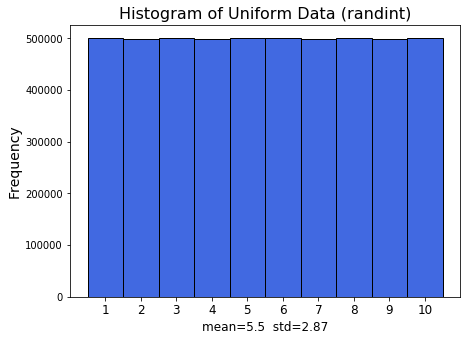

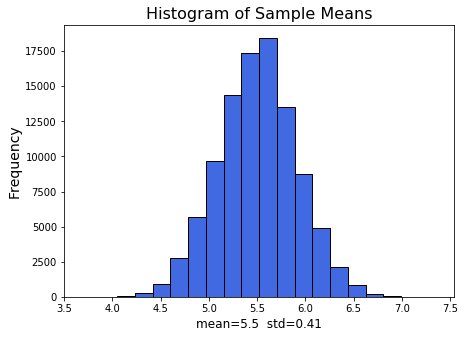


Conclusion: 
* The Mean µ of the original data is equal to the mean of samples mean, µ = samples_mean =  5.5
* The standard deviation of the samples equal to σ/sqrt(50),  samples_std = σ/sqrt(50) =  0.41


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as st
import sys

#npdata = np.random.choice(range(1,11),size=(50,100000))
original = np.random.choice(range(1,11),size = 5000000 )
npdata = np.reshape(original,(50,100000))

# array of means (mean foe every sample/column)
samples_mean_arr = npdata.mean(axis=0)
#print(samples_mean_arr)

# total mean and std for the data set
µ = npdata.mean().round(2)
σ = npdata.std().round(2)
#print ( µ, σ)

# mean and std for the mean array 
samples_mean = samples_mean_arr.mean().round(2)
samples_std = samples_mean_arr.std().round(2)

ind = np.arange(1,11,1)
bins = np.arange(1,12) - 0.5
fig1 = plt.figure(figsize=(7,5))
plt.hist(original, color='royalblue', bins=bins, edgecolor='black', width = 1, align='mid')
plt.xticks(ind, fontsize=12)
plt.xlabel('mean=' + str(µ) + '  std=' + str(σ) , fontsize=12)
plt.ylabel('Frequency',fontsize=14)
plt.title("Histogram of Uniform Data (randint)", fontsize=16)

fig2 = plt.figure(figsize=(7,5))
freq_arr, bins, bars= plt.hist(samples_mean_arr, color='royalblue', bins=20, edgecolor='black')

plt.xlabel('mean=' + str(samples_mean) + '  std=' + str(samples_std) , fontsize=12)
plt.ylabel('Frequency',fontsize=14)
plt.title("Histogram of Sample Means", fontsize=16)
plt.show()  

print("\nConclusion: ")
print("* The Mean µ of the original data is equal to the mean of samples mean, µ = samples_mean = ", samples_mean)
print("* The standard deviation of the samples equal to σ/sqrt(50),  samples_std = σ/sqrt(50) = ", (σ/math.sqrt(50)).round(2))

Q2) (15 points) Convert the sample means to standard score (z) and plot it.

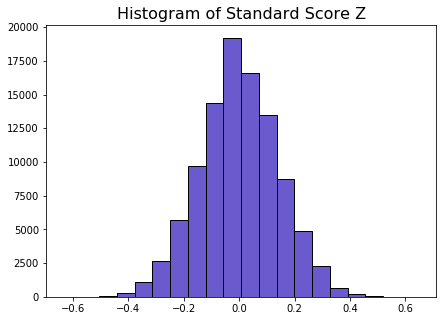

In [3]:
# z = x - µ / σ
z_samples = [(x-µ)/σ for x in samples_mean_arr]
#print(z_samples)

fig = plt.figure(figsize=(7,5))
plt.hist(z_samples, color='slateblue', bins=20, edgecolor='black')
plt.title("Histogram of Standard Score Z", fontsize=16)
plt.show()  

Q3) (15 points) Write your own function to plot the normal distribution curve for sample means from Q1. Don’t use any built-in function that can be used to generate/plot the normal curve in red. You may use f(x) below to generate the curve.

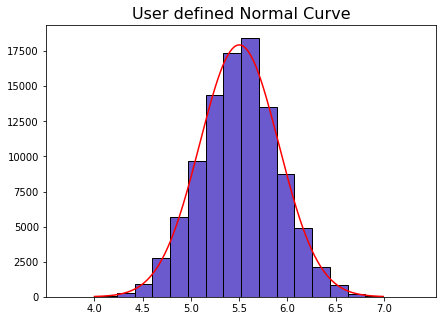

In [4]:
def f(x , mean ,std ):
    return math.exp(-0.5* ((x - mean)/std)**2) / (std * np.sqrt(2*np.pi))

h = np.arange(4,7,0.01)
y = np.zeros(len(h))
i = 0
for x in h:
    y[i] = f(x, samples_mean, samples_std) * max(freq_arr)
    i = i + 1

t = np.linspace(4, 7, 100000)
ind = np.arange(4,7.5,0.5)
fig = plt.figure(figsize=(7,5))
plt.plot(h, y, color='r' ) 
plt.xticks(ind, fontsize=10)

plt.hist(samples_mean_arr, color='slateblue', bins=20, edgecolor='black')
plt.title("User defined Normal Curve", fontsize=16)
plt.show() 


Q4) (40 points) Create a standard normal distribution (mean=0, Std Deviation=1) curve in python and then shade area to the left, right or the middle of z-score(s) based on the input from the user. The user will provide the input as a sequence of 2 or 3 space-separated string. The first character is either (<, >, or =). The second and third inputs are actually numerical. The only case the program accepts 3 inputs is when the first character is ‘=’. The first character defines which area to shade under the curve. If < is used, then your program will shade the area left to the provided number after <. If > is used, your program will shade the area right to the provided number. If = is used, your program expects two numbers to shade the area in-between. The numbers are given in increasing value. Thus, first number is used as the lower limit of the area to shade and the second number is used as an upper limit. Calculate the probability (P) for the shaded area and add it as a text into the plot. To shade the area, you may use plt.fill_between() method. This method fills the area between two given horizontal curves. To draw the curve for the standard normal distribution, use the user-defined function you wrote in Q3. Where x is a np.arange(-3,3,0.01). Below find some examples.

Enter you input: = -1 1.5
valid input


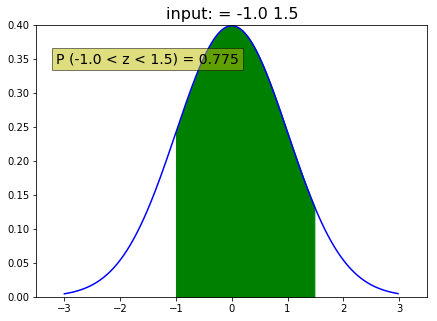

In [5]:
def applytoArray(arr, mean, s):
    t = np.zeros(len(arr))
    i = 0
    for x in arr:
        t[i] = f(x, 0, 1)
        i = i + 1   
    return t

def plot_line(a, *b):
    b = list(b)
    k = np.arange(-3,3,0.02)
    ind = np.arange(-3,4,1)
    t = applytoArray(k, 0, 1)
    
    if len(b) == 1:
        if a == ">":
            #p = np.random.uniform(low= float(b[0]), high=3, size=(300,))
            p = k[k>b[0]]
            prob = 1 - st.norm.cdf(float(b[0]))
            textstr = "P (z > " + str(b[0]) + ") = " + str(prob.round(3))
        elif a == "<":
            #p  = np.random.uniform(low=-3, high=float(b[0]), size=(300,))
            p = k[k<b[0]]
            prob = st.norm.cdf(float(b[0]))
            textstr = "P (z < " + str(b[0]) + ") = " + str(prob.round(3)) 

        fig, ax = plt.subplots(figsize=(7,5))
        props = dict(boxstyle='square', facecolor='y', alpha=0.5)
        # place a text box in upper left in axes coords
        plt.text(0.05, 0.9, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)
        
        plt.plot(k, t, color='b' ) 
        plt.xticks(ind, fontsize=10)
        plt.title("input: " + a + " " + str(b[0]), fontsize=16)
        t1 = applytoArray(p, 0, 1)
        plt.axis([-3.5, 3.5, 0, 0.4])
        plt.fill_between(p , 0, t1, color='green')
        plt.show()
        
    if len(b) == 2:
        #p  = np.random.uniform(low=float(b[0]), high=float(b[1]), size=(300,))
        p = k[b[0]<k]
        p = p[p<b[1]]  
        t1 = applytoArray(p, 0, 1)
        prob = st.norm.cdf(float(b[1])) - st.norm.cdf(float(b[0]))
        textstr = "P (" +str(b[0]) + " < z < " + str(b[1]) + ") = " + str(prob.round(3)) 
            
        fig, ax = plt.subplots(figsize=(7,5))
        props = dict(boxstyle='square', facecolor='y', alpha=0.5)
        # place a text box in upper left in axes coords
        plt.text(0.05, 0.9, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)
        
        plt.plot(k, t, color='b' )
        plt.axis([-3.5, 3.5, 0, 0.4])
        plt.xticks(ind, fontsize=10)
        plt.title("input: " + a + " " + str(b[0]) + " " + str(b[1]), fontsize=16)
        plt.fill_between(p ,0 , t1,  color='green')
        plt.show()
        
user_input = input("Enter you input: ")
user_input = user_input.split()

if len(user_input) == 2:
    try:
        num1 = float(user_input[1])
        if user_input[0] == '<':
            print("valid input")
        elif user_input[0] == '>' :
            print("valid input")        
        else:
            print("Error: invalid input!")
        
    except ValueError:  
        print("Error Usage: '<' or '>' and [number]")
        sys.exit(1)
        
elif len(user_input) == 3:
    try:    
        num1 = float(user_input[1])
        num2 = float(user_input[2])
        if user_input[0] == '=' :
            print("valid input")
        else:
            print("Error: invalid input!")
    except ValueError:
        print("Error Usage: '<' [number1] [number2]")
        sys.exit(1)
else:
    print("Invalid input: too many or too few entries!")

if len(user_input) == 2:
    if user_input[0] == '<':
        plot_line('<' , float(user_input[1]))
    elif user_input[0] == '>' :
        plot_line('>' , float(user_input[1]))
if len(user_input) == 3:
    plot_line('=' , float(user_input[1]), float(user_input[2]))
    